# Generar Dataset

In [379]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import datetime
import seaborn as sns

In [217]:
df_feat = pd.read_csv("../raw_data/lote_prueba3.csv")

In [218]:
df_feat.head()

,YEAR,DOY,CLRSKY_SFC_PAR_TOT,T2M,TS,PRECTOTCORR,GWETTOP,GWETROOT
0,2002,42,140.01,23.39,23.58,1.85,0.62,0.64
1,2002,43,147.80,24.95,26.33,0.10,0.61,0.64
2,2002,44,146.81,25.32,26.83,0.00,0.60,0.63
3,2002,45,138.27,24.28,25.45,0.21,0.60,0.62
4,2002,46,150.99,18.94,20.37,0.00,0.60,0.62


In [219]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7432 entries, 0 to 7431
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YEAR                7432 non-null   int64  
 1   DOY                 7432 non-null   int64  
 2   CLRSKY_SFC_PAR_TOT  7432 non-null   float64
 3   T2M                 7432 non-null   float64
 4   TS                  7432 non-null   float64
 5   PRECTOTCORR         7432 non-null   float64
 6   GWETTOP             7432 non-null   float64
 7   GWETROOT            7432 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 464.6 KB


In [220]:
#df.date = 0

#for index, row in df.iterrows():    
    
#    df.loc[index,'date'] = datetime.datetime(int(row.YEAR), 1, 1) + datetime.timedelta(int(row.DOY) - 1)
    
#df.date = pd.to_datetime(df.date)

In [221]:
df = df.rename(columns={'CLRSKY_SFC_PAR_TOT':'rad', 
                        'T2M':'temp_2m',
                        'TS':'temp_sup',
                        'GWETTOP':'hum_arriba',
                        'GWETROOT':'hum_raiz',
                        'PRECTOTCORR':'precip'}) 

In [222]:
df_feat_8d = df.groupby(np.arange(len(df))//8).mean()

In [223]:
df_feat_8d = df_feat_8d.drop(['YEAR', 'DOY'],1)

/tmp/ipykernel_520/335389499.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_feat_8d = df_feat_8d.drop(['YEAR', 'DOY'],1)


In [224]:
df_feat_8d.head(20)

,rad,temp_2m,temp_sup,precip,hum_arriba,hum_raiz
0,164.50875,22.94500,24.24375,1.66750,0.61375,0.64250
1,157.85125,25.43125,26.77875,1.97375,0.55500,0.62250
2,158.29500,23.01875,24.31625,0.96000,0.57500,0.62125
3,150.28000,20.87125,21.67250,3.96000,0.62750,0.63250
4,144.46750,21.66500,22.98000,0.88125,0.59875,0.62375
5,136.25750,22.54750,23.30000,4.77625,0.61625,0.62750
6,128.40875,20.26125,20.58750,11.50000,0.70750,0.70125
7,119.40125,20.46250,20.48625,12.60750,0.80250,0.75875
8,116.08500,17.55250,17.64875,5.82375,0.84750,0.81375
9,107.65500,14.99500,14.92500,13.88125,0.85125,0.81625


In [225]:
#plt.figure(figsize=(16,9))
#plt.plot(df.CLRSKY_SFC_PAR_TOT[:-1000], label='Radiacion')

In [226]:
#plt.figure(figsize=(16,9))
#plt.plot(df.T2M[:-1000], label='Temp 2m')

In [227]:
#plt.figure(figsize=(16,9))
#plt.plot(df.PRECTOTCORR[:-1000], label='Temp 2m')

In [228]:
df_past = pd.read_csv("../raw_data/prueba_punto_productividad.csv")

In [229]:
df_past.head()

,system:index,first,.geo
0,2002_02_18_0,0.0508,"{""type"":""Point"",""coordinates"":[-58.52642552110..."
1,2002_02_26_0,0.0381,"{""type"":""Point"",""coordinates"":[-58.52642552110..."
2,2002_03_06_0,0.0397,"{""type"":""Point"",""coordinates"":[-58.52642552110..."
3,2002_03_14_0,0.0402,"{""type"":""Point"",""coordinates"":[-58.52642552110..."
4,2002_03_22_0,0.0000,"{""type"":""Point"",""coordinates"":[-58.52642552110..."


In [230]:
df_past = df_past.rename(columns={'system:index':'date', 'first':'prod'})
df_past = df_past.drop('.geo',1)

/tmp/ipykernel_520/2674065925.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_past = df_past.drop('.geo',1)


In [231]:
df_past.head()

,date,prod
0,2002_02_18_0,0.0508
1,2002_02_26_0,0.0381
2,2002_03_06_0,0.0397
3,2002_03_14_0,0.0402
4,2002_03_22_0,0.0000


In [232]:
df_past.date = df_past.date.apply(lambda s: datetime.date(int(s[0:4]),int(s[5:7]),int(s[8:10])))

In [233]:
df_past.head()

,date,prod
0,2002-02-18,0.0508
1,2002-02-26,0.0381
2,2002-03-06,0.0397
3,2002-03-14,0.0402
4,2002-03-22,0.0000


In [244]:
df_total = pd.concat([df_feat_8d,df_past], axis=1)

In [235]:
df_total = df_total.set_index('date')

In [245]:
df_total.head(20)

,rad,temp_2m,temp_sup,precip,hum_arriba,hum_raiz,date,prod
0,164.50875,22.94500,24.24375,1.66750,0.61375,0.64250,2002-02-18,0.0508
1,157.85125,25.43125,26.77875,1.97375,0.55500,0.62250,2002-02-26,0.0381
2,158.29500,23.01875,24.31625,0.96000,0.57500,0.62125,2002-03-06,0.0397
3,150.28000,20.87125,21.67250,3.96000,0.62750,0.63250,2002-03-14,0.0402
4,144.46750,21.66500,22.98000,0.88125,0.59875,0.62375,2002-03-22,0.0000
5,136.25750,22.54750,23.30000,4.77625,0.61625,0.62750,2002-03-30,0.0343
6,128.40875,20.26125,20.58750,11.50000,0.70750,0.70125,2002-04-07,0.0041
7,119.40125,20.46250,20.48625,12.60750,0.80250,0.75875,2002-04-15,0.0246
8,116.08500,17.55250,17.64875,5.82375,0.84750,0.81375,2002-04-23,0.0259
9,107.65500,14.99500,14.92500,13.88125,0.85125,0.81625,2002-05-01,0.0250


In [254]:
df_total['ym'] = df_total.date.apply(lambda d: str(d.year) + '-' + str(d.month))

In [255]:
#plt.figure(figsize=(16,9))
#plt.plot(df_past.iloc[:,1], label='Productividad')

In [272]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934 entries, 0 to 933
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rad         933 non-null    float64
 1   temp_2m     933 non-null    float64
 2   temp_sup    933 non-null    float64
 3   precip      933 non-null    float64
 4   hum_arriba  933 non-null    float64
 5   hum_raiz    933 non-null    float64
 6   date        934 non-null    object 
 7   prod        934 non-null    float64
 8   ym          934 non-null    object 
dtypes: float64(7), object(2)
memory usage: 73.0+ KB


In [268]:
df_total.head(30)

,rad,temp_2m,temp_sup,precip,hum_arriba,hum_raiz,date,prod,ym
0,164.50875,22.94500,24.24375,1.66750,0.61375,0.64250,2002-02-18,0.0508,2002-2
1,157.85125,25.43125,26.77875,1.97375,0.55500,0.62250,2002-02-26,0.0381,2002-2
2,158.29500,23.01875,24.31625,0.96000,0.57500,0.62125,2002-03-06,0.0397,2002-3
3,150.28000,20.87125,21.67250,3.96000,0.62750,0.63250,2002-03-14,0.0402,2002-3
4,144.46750,21.66500,22.98000,0.88125,0.59875,0.62375,2002-03-22,0.0000,2002-3
5,136.25750,22.54750,23.30000,4.77625,0.61625,0.62750,2002-03-30,0.0343,2002-3
6,128.40875,20.26125,20.58750,11.50000,0.70750,0.70125,2002-04-07,0.0041,2002-4
7,119.40125,20.46250,20.48625,12.60750,0.80250,0.75875,2002-04-15,0.0246,2002-4
8,116.08500,17.55250,17.64875,5.82375,0.84750,0.81375,2002-04-23,0.0259,2002-4
9,107.65500,14.99500,14.92500,13.88125,0.85125,0.81625,2002-05-01,0.0250,2002-5


In [606]:
df_nino = pd.read_csv("../raw_data/ENSO.csv")

In [607]:
df_nino.head()

,date,ENSOIndex,ENSOType
0,2022-7,0.0,...
1,2022-6,0.0,ML ...
2,2022-5,0.0,ML ...
3,2022-4,-1.1,ML ...
4,2022-3,-1.0,ML ...


In [608]:
df_nino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       866 non-null    object 
 1   ENSOIndex  866 non-null    float64
 2   ENSOType   866 non-null    object 
dtypes: float64(1), object(2)
memory usage: 20.4+ KB


In [609]:
df_nino = df_nino.rename(columns={'date': 'ym'})

In [610]:
df_nino.ym = df_nino.ym.astype('string')

In [611]:
df_final = pd.merge(left=df_total,right=df_nino, on='ym', how='inner')

In [612]:
df_final = df_final.drop('ym',1)

/tmp/ipykernel_520/755221887.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_final = df_final.drop('ym',1)


In [613]:
df_final = df_final.set_index('date')

In [614]:
df_final.tail(20)

,rad,temp_2m,temp_sup,precip,hum_arriba,hum_raiz,prod,ENSOIndex,ENSOType
date,,,,,,,,,
2022-01-01,-999.00000,22.990000,23.247500,13.527500,0.74625,0.71000,0.0345,-1.0,ML ...
2022-01-09,-855.14750,20.826250,21.446250,1.408750,0.68625,0.70500,0.0148,-1.0,ML ...
2022-01-17,149.43125,19.707500,20.356250,4.046250,0.70250,0.70375,0.0265,-1.0,ML ...
2022-01-25,147.88250,20.112500,20.783750,0.535000,0.64125,0.67250,0.0585,-1.0,ML ...
2022-02-02,137.83875,21.441250,22.120000,3.647500,0.64625,0.65750,0.0555,-0.9,ML ...
2022-02-10,-573.48250,19.803750,20.118750,4.448750,-624.10625,-624.11125,0.0551,-0.9,ML ...
2022-02-18,-999.00000,18.605000,19.047500,1.401250,-999.00000,-999.00000,0.0606,-0.9,ML ...
2022-02-26,-999.00000,17.691250,18.062500,4.535000,-999.00000,-999.00000,0.0475,-0.9,ML ...
2022-03-06,-999.00000,16.686250,16.805000,2.450000,-999.00000,-999.00000,0.1127,-1.0,ML ...


In [615]:
df_final.to_csv('../raw_data/data_set_completo_Latitude -36.4041 Longitude -58.5546.csv')

# EDA

In [616]:
df = pd.read_csv('../raw_data/data_set_completo_Latitude -36.4041 Longitude -58.5546.csv')

In [617]:
df.tail()

,date,rad,temp_2m,temp_sup,precip,hum_arriba,hum_raiz,prod,ENSOIndex,ENSOType
929,2022-05-01,-999.0,9.502500,9.185000,1.565000,-999.0,-999.0,0.0238,0.0,ML ...
930,2022-05-09,-999.0,4.602500,4.213750,0.322500,-999.0,-999.0,0.0187,0.0,ML ...
931,2022-05-17,-999.0,6.201250,5.792500,0.070000,-999.0,-999.0,0.0148,0.0,ML ...
932,2022-05-25,-999.0,-280.548571,-281.192857,-285.417143,-999.0,-999.0,0.0090,0.0,ML ...
933,2022-06-02,NaN,NaN,NaN,NaN,NaN,NaN,0.0080,0.0,ML ...


In [618]:
df.date =  pd.to_datetime(df.date)

In [619]:
df = df[df.date < '2022-02-20']

In [620]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 921 entries, 0 to 920
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        921 non-null    datetime64[ns]
 1   rad         921 non-null    float64       
 2   temp_2m     921 non-null    float64       
 3   temp_sup    921 non-null    float64       
 4   precip      921 non-null    float64       
 5   hum_arriba  921 non-null    float64       
 6   hum_raiz    921 non-null    float64       
 7   prod        921 non-null    float64       
 8   ENSOIndex   921 non-null    float64       
 9   ENSOType    921 non-null    object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 79.1+ KB


In [621]:
df.tail()

,date,rad,temp_2m,temp_sup,precip,hum_arriba,hum_raiz,prod,ENSOIndex,ENSOType
916,2022-01-17,149.43125,19.70750,20.35625,4.04625,0.70250,0.70375,0.0265,-1.0,ML ...
917,2022-01-25,147.88250,20.11250,20.78375,0.53500,0.64125,0.67250,0.0585,-1.0,ML ...
918,2022-02-02,137.83875,21.44125,22.12000,3.64750,0.64625,0.65750,0.0555,-0.9,ML ...
919,2022-02-10,-573.48250,19.80375,20.11875,4.44875,-624.10625,-624.11125,0.0551,-0.9,ML ...
920,2022-02-18,-999.00000,18.60500,19.04750,1.40125,-999.00000,-999.00000,0.0606,-0.9,ML ...


In [622]:
df.shape[0]

921

In [623]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 921 entries, 0 to 920
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        921 non-null    datetime64[ns]
 1   rad         921 non-null    float64       
 2   temp_2m     921 non-null    float64       
 3   temp_sup    921 non-null    float64       
 4   precip      921 non-null    float64       
 5   hum_arriba  921 non-null    float64       
 6   hum_raiz    921 non-null    float64       
 7   prod        921 non-null    float64       
 8   ENSOIndex   921 non-null    float64       
 9   ENSOType    921 non-null    object        
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 79.1+ KB


In [624]:
df.describe()

,rad,temp_2m,temp_sup,precip,hum_arriba,hum_raiz,prod,ENSOIndex
count,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000,921.000000
mean,104.154415,15.164230,15.422993,2.636592,-1.051625,-1.044342,0.030563,0.021498
std,85.657613,6.016286,6.535922,3.047826,38.827474,38.827824,0.016371,0.795623
min,-999.000000,2.722500,2.470000,0.000000,-999.000000,-999.000000,0.000000,-1.700000
25%,66.418750,9.967500,9.767500,0.408750,0.641250,0.660000,0.015200,-0.500000
50%,109.082500,14.890000,15.112500,1.690000,0.713750,0.713750,0.029700,0.000000
75%,151.013750,20.436250,21.280000,3.650000,0.786250,0.766250,0.043300,0.500000
max,173.392500,28.656250,30.093750,23.032500,0.911250,0.915000,0.083200,2.600000


/home/lucianov84/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date', ylabel='rad'>

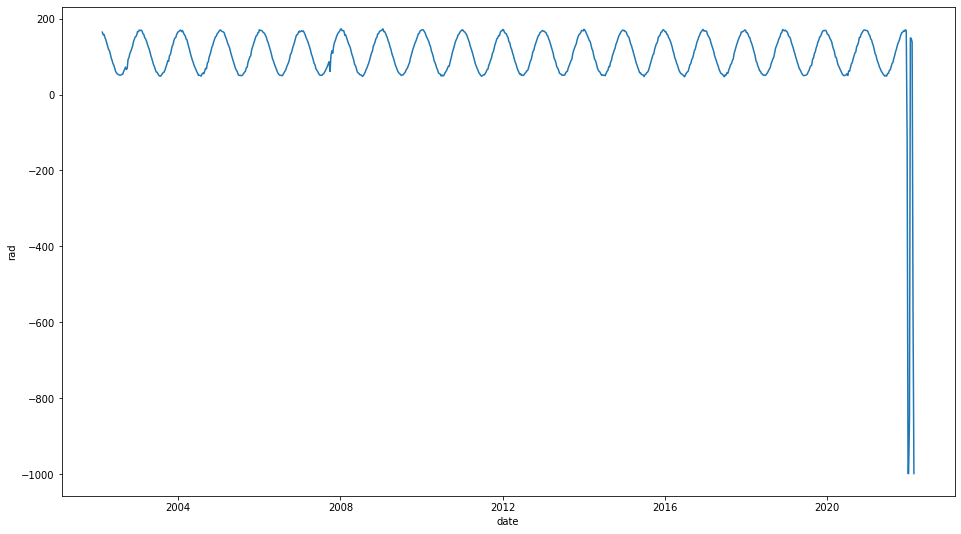

In [625]:
plt.figure(figsize=(16,9))
sns.lineplot(df.date,df.rad)

/home/lucianov84/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date', ylabel='temp_2m'>

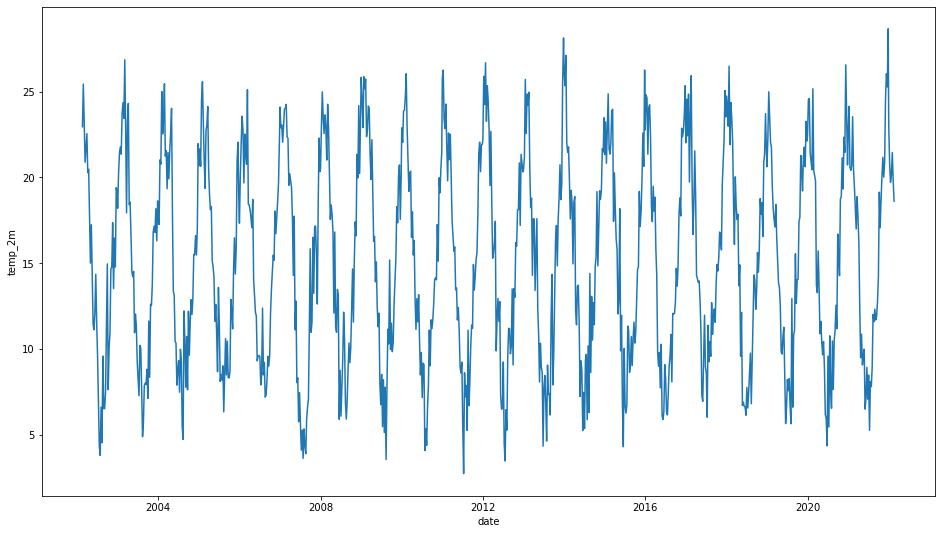

In [626]:
plt.figure(figsize=(16,9))
sns.lineplot(df.date,df.temp_2m)

/home/lucianov84/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date', ylabel='temp_sup'>

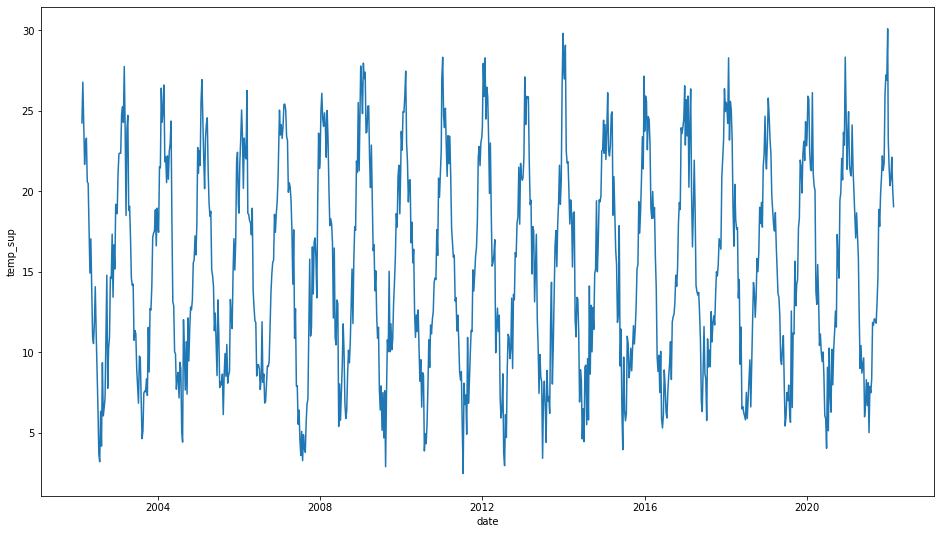

In [627]:
plt.figure(figsize=(16,9))
sns.lineplot(df.date,df.temp_sup)

/home/lucianov84/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(-5.0, 5.0)

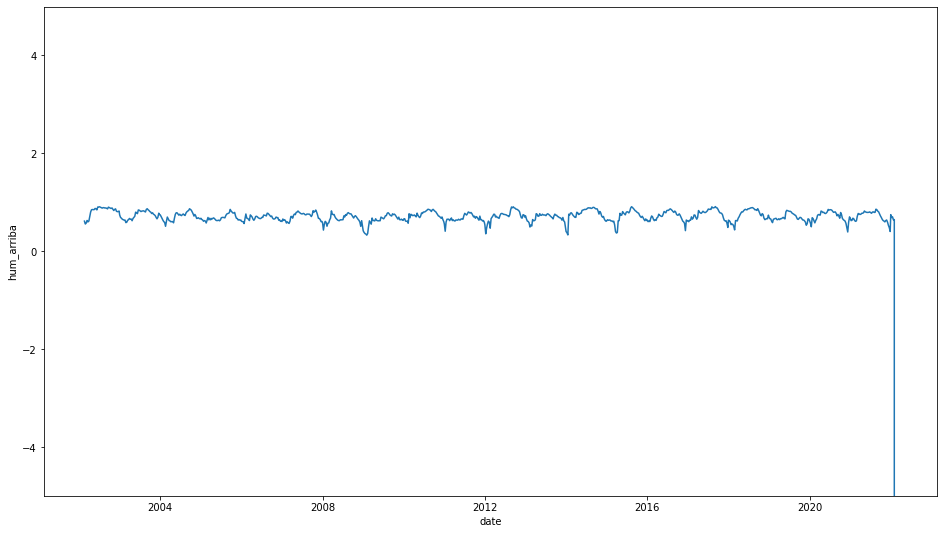

In [628]:
plt.figure(figsize=(16,9))
sns.lineplot(df.date,df.hum_arriba)
plt.ylim((-5,5))

/home/lucianov84/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(-5.0, 5.0)

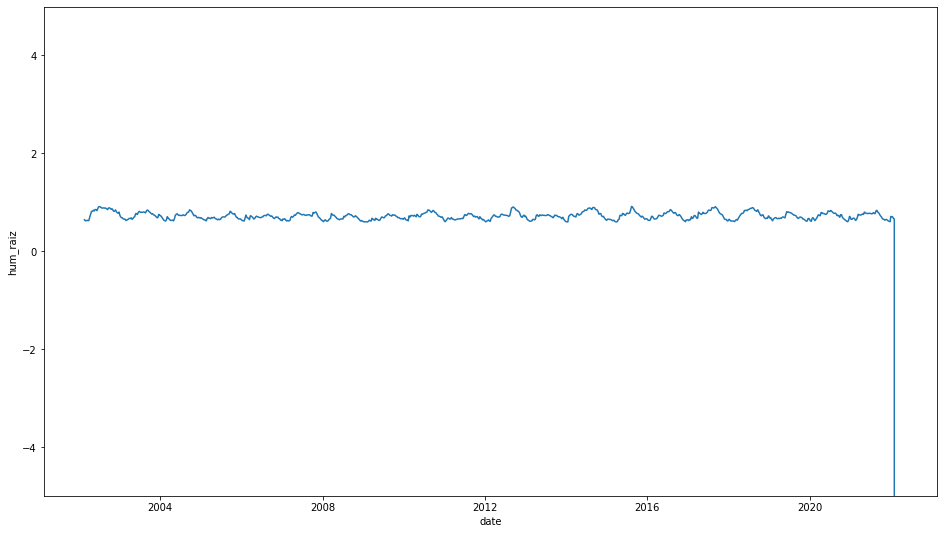

In [629]:
plt.figure(figsize=(16,9))
sns.lineplot(df.date,df.hum_raiz)
plt.ylim((-5,5))

/home/lucianov84/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(-1.0, 1.0)

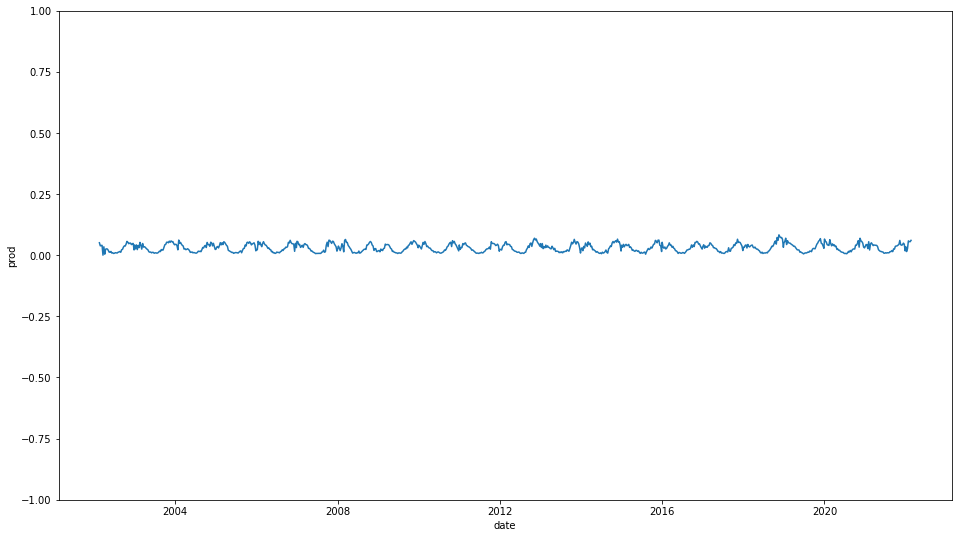

In [630]:
plt.figure(figsize=(16,9))
sns.lineplot(df.date,df['prod'])
plt.ylim((-1,1))

In [631]:
df.rad[df.rad < 0] = np.nan
df.temp_2m[df.temp_2m < -50] = np.nan
df.temp_sup[df.temp_sup < -50] = np.nan
df.hum_arriba[df.hum_arriba < 0] = np.nan
df.hum_raiz[df.hum_raiz < 0] = np.nan

In [632]:
df.head()

,date,rad,temp_2m,temp_sup,precip,hum_arriba,hum_raiz,prod,ENSOIndex,ENSOType
0,2002-02-18,164.50875,22.94500,24.24375,1.66750,0.61375,0.64250,0.0508,0.0,...
1,2002-02-26,157.85125,25.43125,26.77875,1.97375,0.55500,0.62250,0.0381,0.0,...
2,2002-03-06,158.29500,23.01875,24.31625,0.96000,0.57500,0.62125,0.0397,0.1,...
3,2002-03-14,150.28000,20.87125,21.67250,3.96000,0.62750,0.63250,0.0402,0.1,...
4,2002-03-22,144.46750,21.66500,22.98000,0.88125,0.59875,0.62375,0.0000,0.1,...


In [633]:
df.describe()

,rad,temp_2m,temp_sup,precip,hum_arriba,hum_raiz,prod,ENSOIndex
count,915.000000,921.000000,921.000000,921.000000,919.000000,919.000000,921.000000,921.000000
mean,109.807456,15.164230,15.422993,2.636592,0.712252,0.719557,0.030563,0.021498
std,42.353777,6.016286,6.535922,3.047826,0.102325,0.071648,0.016371,0.795623
min,46.816250,2.722500,2.470000,0.000000,0.327500,0.597500,0.000000,-1.700000
25%,67.113750,9.967500,9.767500,0.408750,0.641875,0.660625,0.015200,-0.500000
50%,109.731250,14.890000,15.112500,1.690000,0.715000,0.713750,0.029700,0.000000
75%,151.371250,20.436250,21.280000,3.650000,0.786250,0.766250,0.043300,0.500000
max,173.392500,28.656250,30.093750,23.032500,0.911250,0.915000,0.083200,2.600000


In [634]:
df.rad = df.rad.interpolate()
df.temp_2m = df.temp_2m.interpolate()
df.temp_sup = df.temp_sup.interpolate()
df.hum_arriba = df.hum_arriba.interpolate()
df.hum_raiz = df.hum_raiz.interpolate()

/home/lucianov84/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'radiacion total')

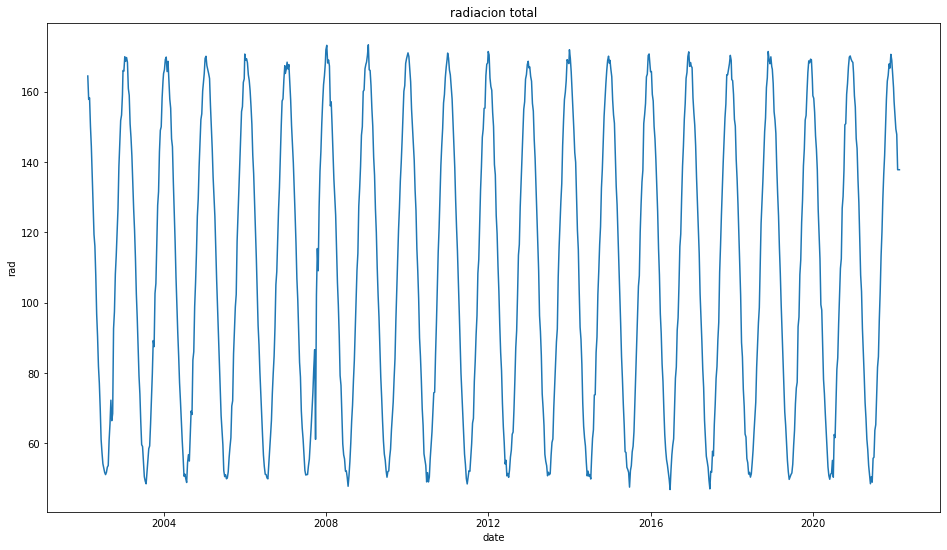

In [635]:
plt.figure(figsize=(16,9))
sns.lineplot(df.date,df.rad)
plt.title('radiacion total')

/home/lucianov84/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'radiacion por año')

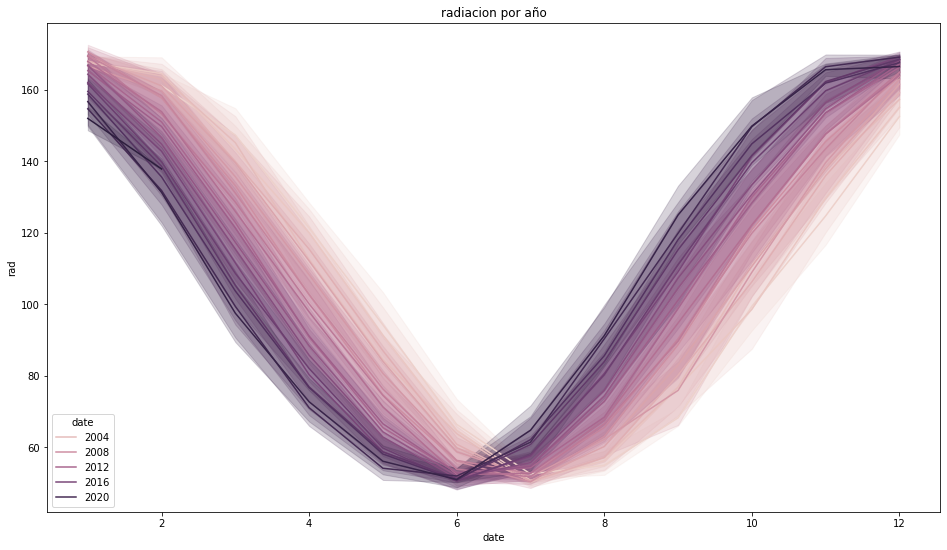

In [636]:
plt.figure(figsize=(16,9))
sns.lineplot(df.date.dt.month,df.rad,hue=df.date.dt.year)
plt.title('radiacion por año')

/home/lucianov84/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'temperatura 2m')

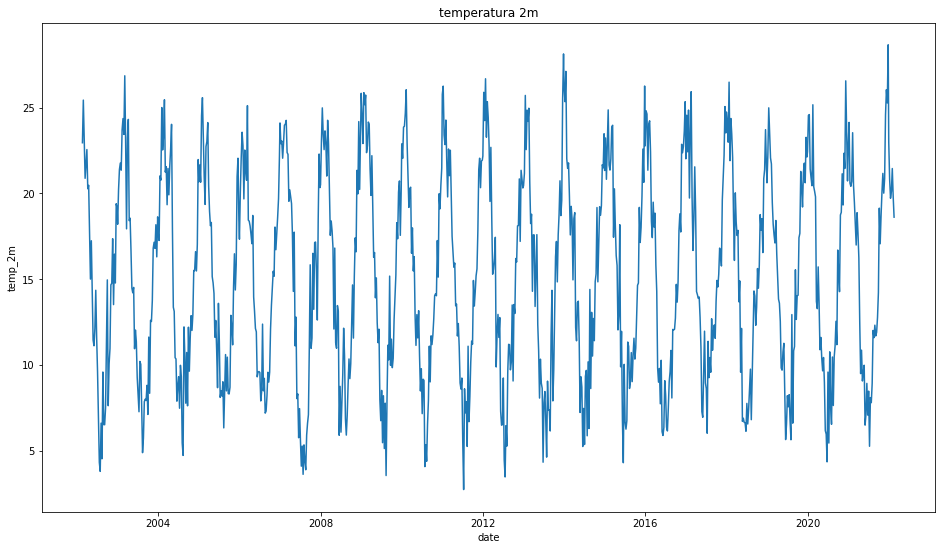

In [637]:
plt.figure(figsize=(16,9))
sns.lineplot(df.date,df.temp_2m)
plt.title('temperatura 2m')

/home/lucianov84/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'temperatura 2m por año')

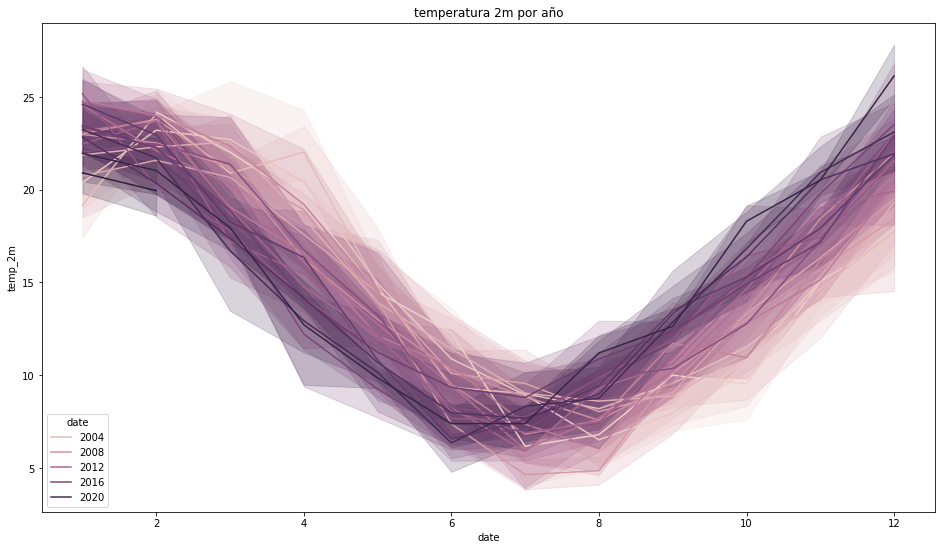

In [638]:
plt.figure(figsize=(16,9))
sns.lineplot(df.date.dt.month,df.temp_2m,hue=df.date.dt.year)
plt.title('temperatura 2m por año')

/home/lucianov84/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'temperatura superficie')

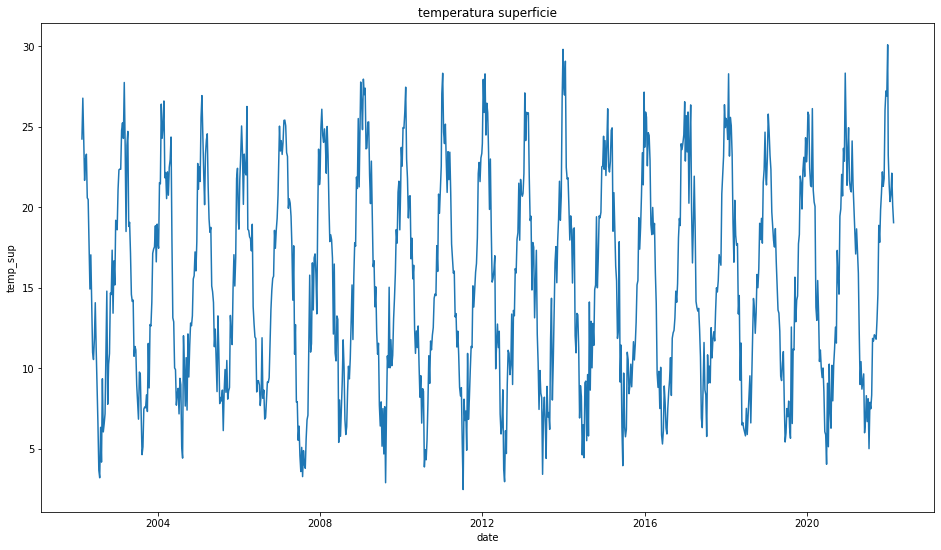

In [639]:
plt.figure(figsize=(16,9))
sns.lineplot(df.date,df.temp_sup)
plt.title('temperatura superficie')

/home/lucianov84/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'temperatura superficie por año')

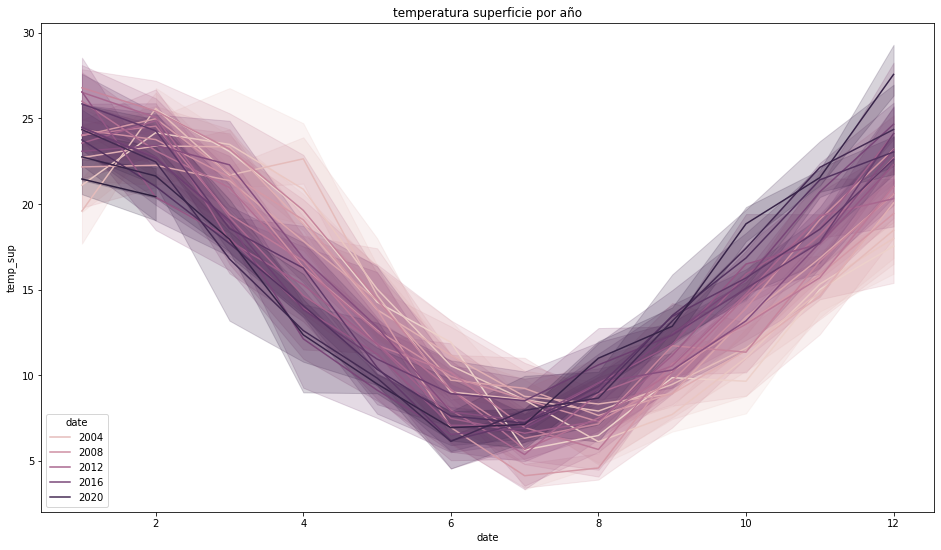

In [640]:
plt.figure(figsize=(16,9))
sns.lineplot(df.date.dt.month,df.temp_sup,hue=df.date.dt.year)
plt.title('temperatura superficie por año')

/home/lucianov84/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date', ylabel='prod'>

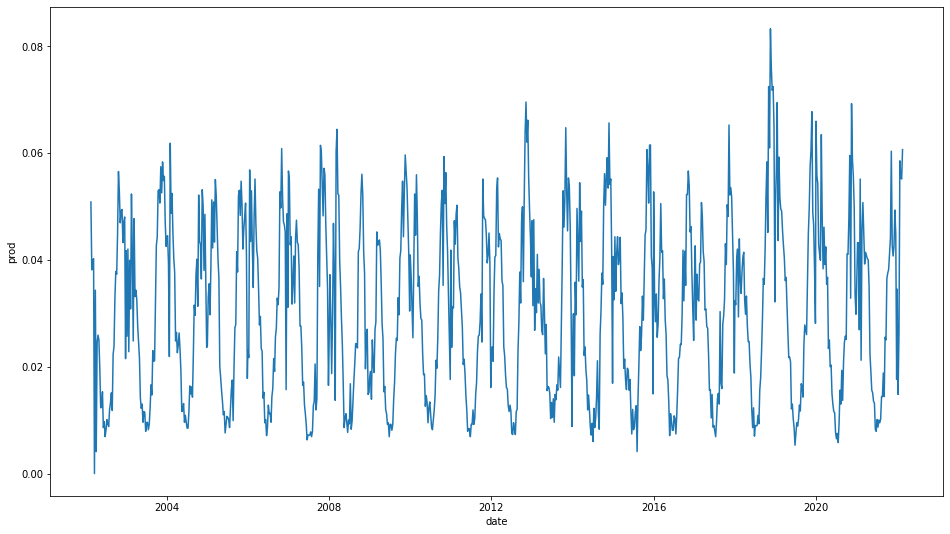

In [641]:
plt.figure(figsize=(16,9))
sns.lineplot(df.date,df['prod'])

/home/lucianov84/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date', ylabel='prod'>

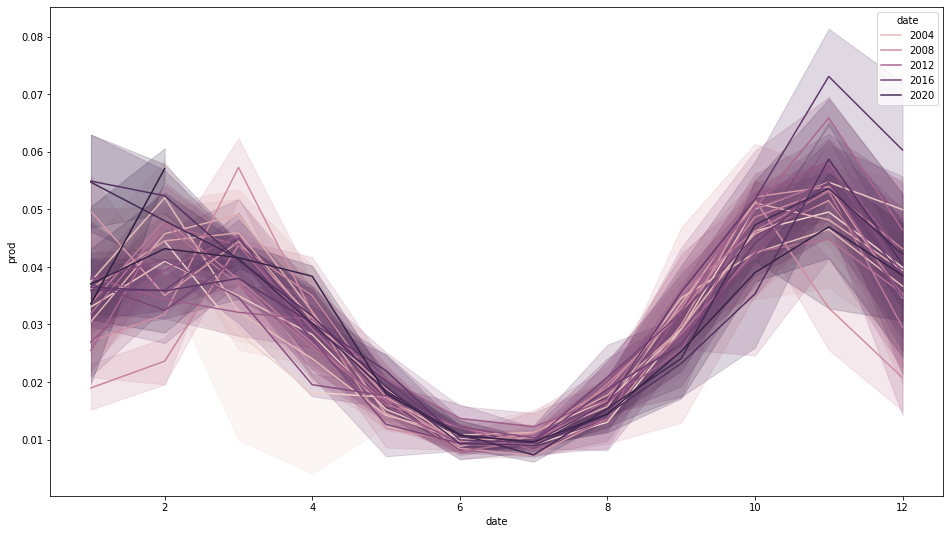

In [642]:
plt.figure(figsize=(16,9))
sns.lineplot(df.date.dt.month,df['prod'],hue=df.date.dt.year)

<AxesSubplot:>

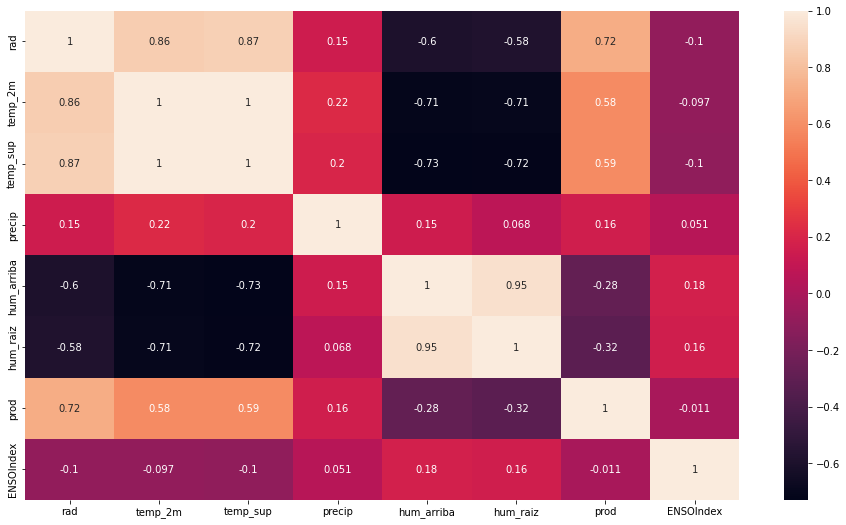

In [644]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True)

/home/lucianov84/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ENSOIndex', ylabel='prod'>

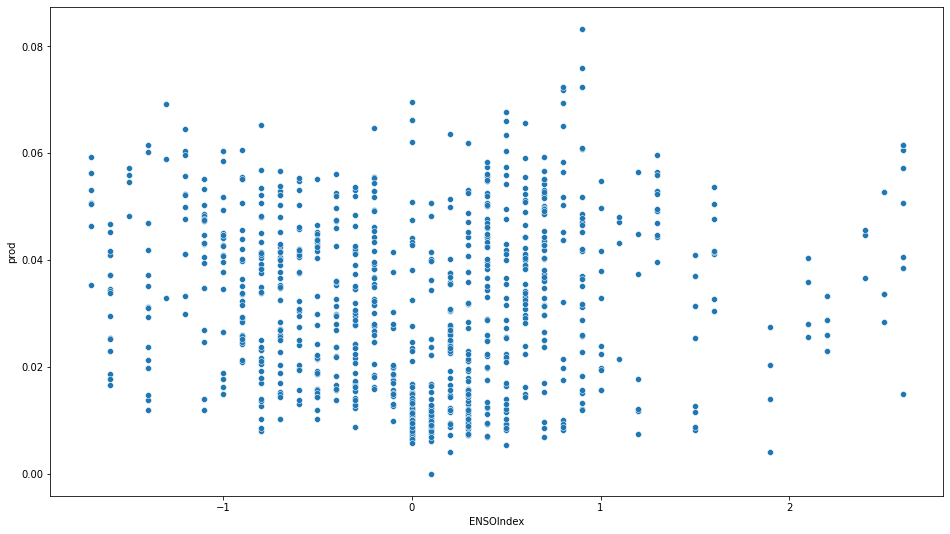

In [645]:
plt.figure(figsize=(16,9))
sns.scatterplot(df.ENSOIndex,df['prod'])

/home/lucianov84/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ENSOType', ylabel='prod'>

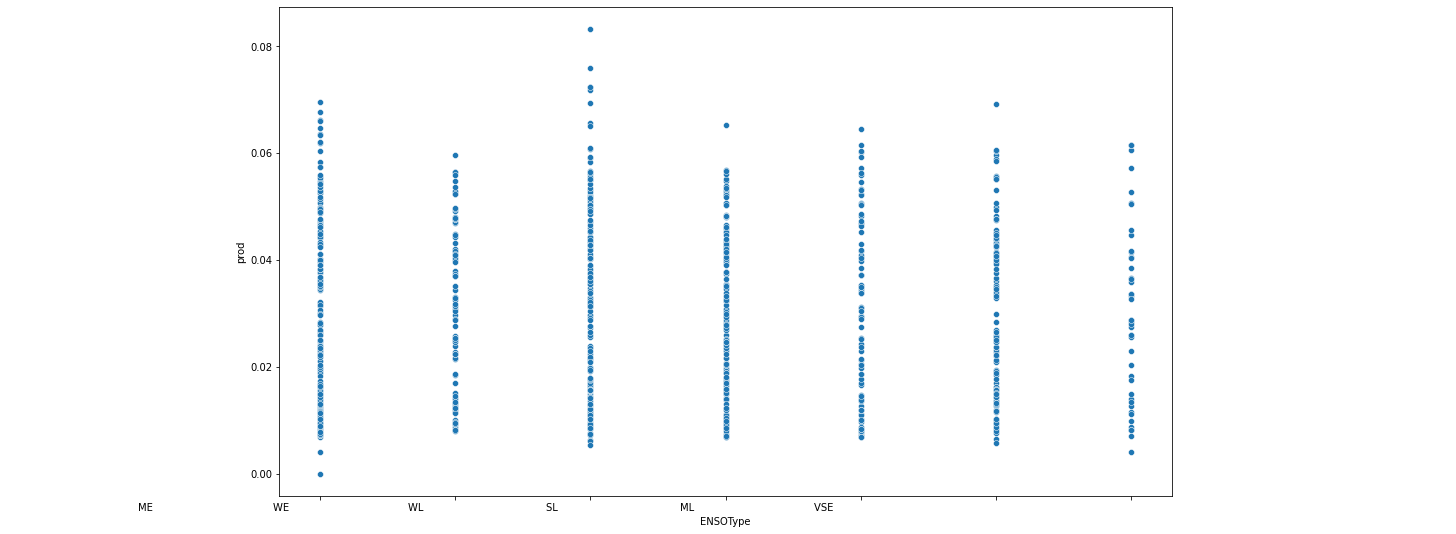

In [646]:
plt.figure(figsize=(16,9))
sns.scatterplot(df.ENSOType,df['prod'])

/home/lucianov84/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ENSOType', ylabel='prod'>

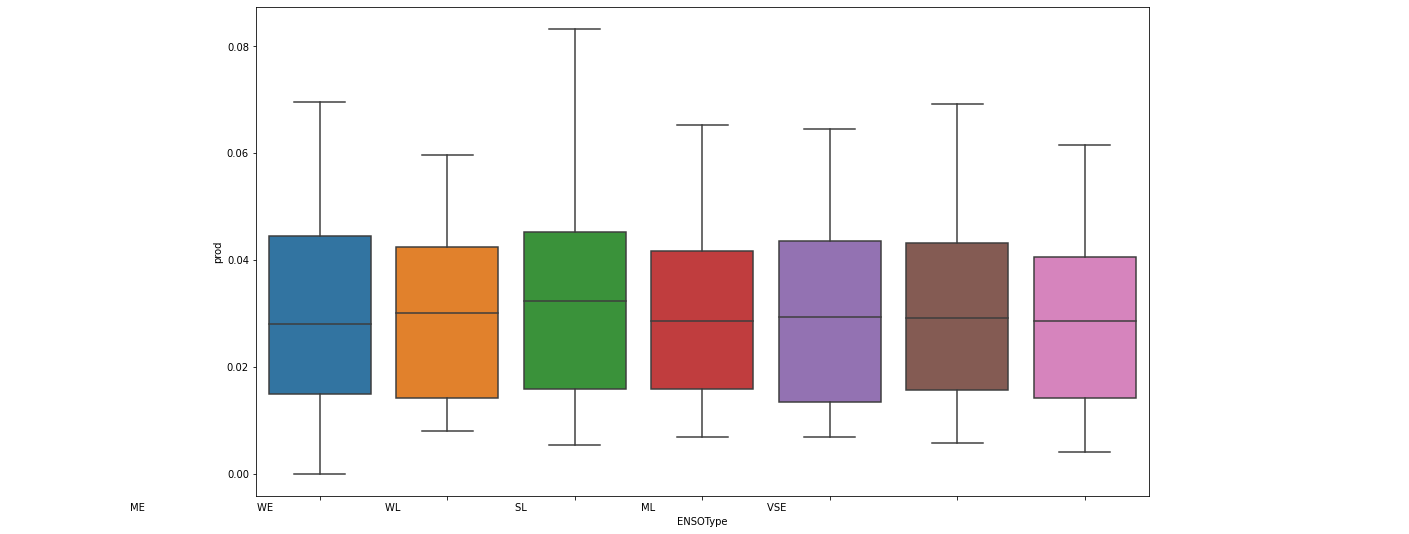

In [647]:
plt.figure(figsize=(16,9))
sns.boxplot(df.ENSOType,df['prod'])

/home/lucianov84/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='precip', ylabel='prod'>

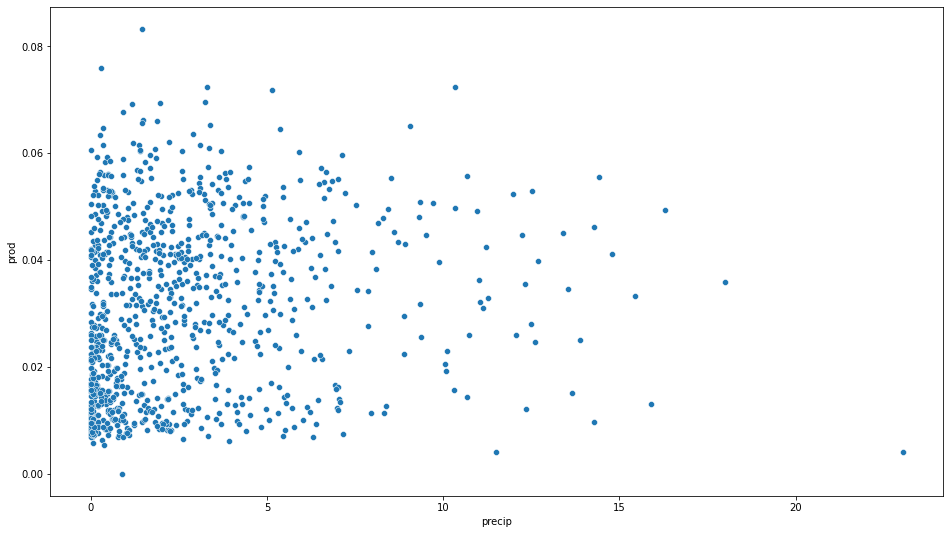

In [648]:
plt.figure(figsize=(16,9))
sns.scatterplot(df.precip,df['prod'])

/home/lucianov84/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rad', ylabel='prod'>

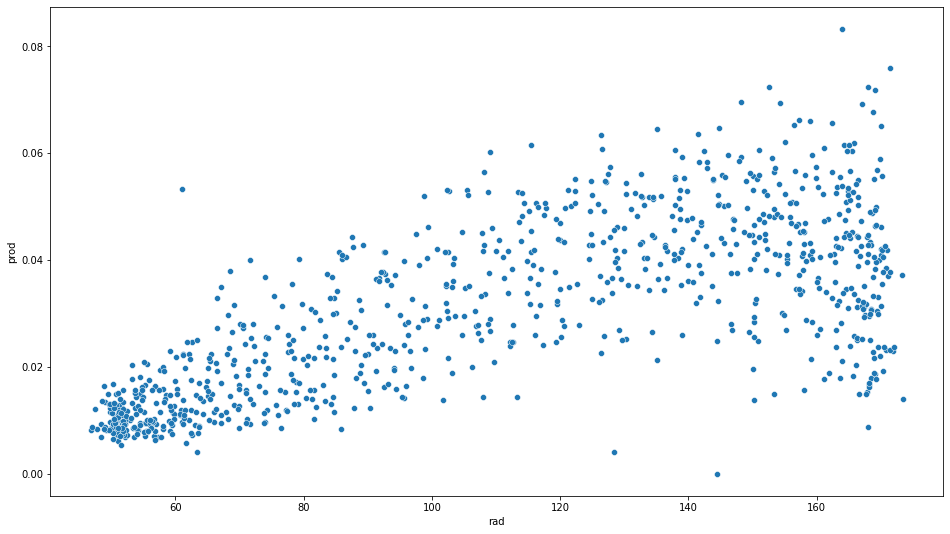

In [650]:
plt.figure(figsize=(16,9))
sns.scatterplot(df.rad,df['prod'])